# The SIR Epidemiological Model
    By Daisy Nsibu

The SIR (Susceptible->Infected->Recovered) model is used under situations in which a recovered person receives lifelong immunity from a disease. An example might be varicella (“Chicken Pox”), where infected and subsequently recovered individuals are considered to have lifelong immunity to the disease and will not contract it again.

The simplest form of this model makes the following assumptions:
- Members of the population mix uniformly (the same degree of interaction between all members).
- The probability of infection is independent of age, race and other demographic/differentiating factors.
- There is no inherited immunity.
- The population does not change.
- Individuals can go from Susceptible->Infected->Recovered, and through no other pathways.

# Getting Started

Before creating any plots, we need to understand mathematical framework for the SIR model. Let’s define the following basic notation:

Our total population is N

Now to the prediction part with the SIR model, which basic idea is quite simple. There are three groups of people: those that are healthy but susceptible to the disease (S), the infected (I) and the people who have recovered (R):

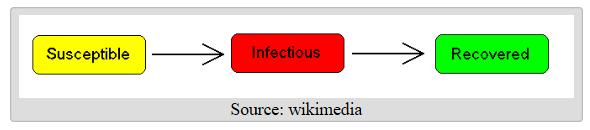

To model the dynamics of the outbreak we need three differential equations, one for the change in each group, where $\beta$ is the parameter that controls the transition between ${S}$ and ${I}$ and $\gamma$  which controls the transition between ${I}$ and ${R}$ :

$$ \frac{dS}{dt} = -\beta\frac{IS}{N}$$

$$ \frac{dI}{dt} = \beta\frac{IS}{N}-\gamma{I}$$

$$ \frac{dR}{dt} = \gamma{I}$$  



The constant $\beta$ represents the contact rate of the disease (an infected individual comes into contact with $\beta{N}$ other individuals per unit time); the value of  must be greater than or equal to zero.

The constant $\gamma$ is the mean recovery rate (which will always be greater than or equal to zero); 

It is important to remember that our total population is described by the sum of susceptible, infected, and recovered individuals:

$$ {N(t)} = {S(t) + I(t) + R(t)}$$

# Building Our Model in Python

First,  import the necessary packages. I’ll be using matplotlib for our plotting package, and the odeint function from scipy to integrate our system of differential equations.

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

The next step will be to set our initial conditions for the model. 

Let’s assume the following scenario: a small contingent of individuals (six people) have returned fully-infected with varicella from a “pox party” in a distant city. All individuals arrive and equally mingle among the population of a small town (total population including infected (N) = 5,000 people) where no one has ever been exposed to varicella (i.e. no recovered individuals). 

I’ll follow the epidemic for 200 days. This may seem like a long time, but it will also allow us more flexibility when experimenting with values for $\beta$  and $\gamma$.

Given the above scenario, we can assign the necessary values in our Python script:

In [2]:
# total population
N = 5000
# initial infected
I0 = 6
# initial recovered
R0 = 0
#initial susceptible
S0 = N - I0 - R0

I’ll also need to assign values for $\beta$ and $\gamma$. We’ll start with $\beta = 0.3$ and $\gamma = 0.1$

In [3]:
# contact rate
beta = 0.3
# mean recovery rate
gamma = 0.1

Now, let’s build our initial conditions vector,  and then use linspace to create an array containing our 200 sampling points (days).

In [4]:
# initial conditions vector
y0 = (S0, I0, R0)
# 200 evenly spaced values (representing days)
t = np.linspace(0, 200, 200)

Arguably, one of the most important parts of the script will be a function containing the differential equations which we will pass to odeint for integration.

In [5]:
# Complete the code for the sir function
def SIR(y, t, N, beta, gamma):
    # S, I, R values assigned from vector
    S, I, R = y
    # differential equations
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N -(gamma * I)             
    dRdt = gamma * I                 
    return dSdt, dIdt, dRdt

I’ll also need to assign values for $\beta$ and $\gamma$. We’ll start with $\beta = 0.3$ and $\gamma = 0.1$, and plot again with $\beta = 0.2$ and $\gamma = 0.1$.  Lower $\beta$ is equivalent to "social distancing" note how the peak is muted and pushed out in time.

In [6]:
# contact rate
beta1 = 0.3
# mean recovery rate
gamma = 0.1

Now pass the function to odeint, and pull the resulting susceptible, infected and recovered values from the transpose of the returned array.

In [7]:
# Complete the code below
# function to integrate SIR model from starting conditions but with ability to change beta over time
def SIR_Integ(y0,t,N,beta_0,gamma):
    
    y = y0
    values = np.zeros((200,3))
    values[0,0] =   S0     # S0
    values[0,1] =   I0      # I0            
    values[0,2] =   R0      # R0
    beta = beta_0
    
    for i in range(1,201):
        dSt, dIt, dRt = SIR(y, t, N, beta, gamma)         
        
        values[i,0] = values[i-1,0]+dSt
        values[i,1] = values[i-1,1]+dIt   
        values[i,2] = values[i-1,2]+dRt
        y = (values[i,0], values[i,1]  ,values[i,2])         
        
    return values

In [8]:
# Integrate the diff eqs over the time array
#values_1 = odeint(func, y0, t, args=(N, beta1, gamma))
values_1 = odeint(SIR, y0, t, args=(N, beta1, gamma))

# assign S, I, R values from values transpose
S1, I1, R1 = values_1.T

In [9]:
# Integrate the diff eqs over the time array
beta2 = 0.2
#values_2 = odeint(func, y0, t, args=(N, beta2, gamma))
values_2 = odeint(SIR, y0, t, args=(N, beta2, gamma))

# assign S, I, R values from values transpose
S2, I2, R2 = values_2.T

Finally,  plot the arrays using matplotlib:

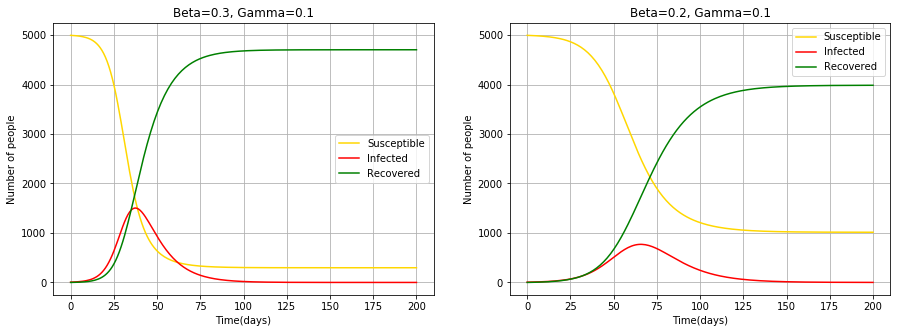

In [10]:
# first figure with higher beta
figure, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

# Your plotting code here
ax[0].plot(t, values_1[:, 0], 'gold', label='Susceptible')
ax[0].plot(t, values_1[:, 1], 'red', label='Infected')
ax[0].plot(t, values_1[:, 2], 'g', label='Recovered')
ax[0].set_title('Beta=0.3, Gamma=0.1')
ax[0].legend(loc='best')
ax[0].set_xlabel('Time(days)')
ax[0].set_ylabel('Number of people')
ax[0].grid()

# first figure with lower beta
ax[1].plot(t, values_2[:, 0], 'gold', label='Susceptible')
ax[1].plot(t, values_2[:, 1], 'red', label='Infected')
ax[1].plot(t, values_2[:, 2], 'g', label='Recovered')
ax[1].set_title('Beta=0.2, Gamma=0.1')
ax[1].legend(loc='best')
ax[1].set_xlabel('Time(days)')
ax[1].set_ylabel('Number of people')
ax[1].grid()


plt.show()

In [11]:
# summarize some of the statistics
R0 = beta1/gamma   
mort = 0.03    # assumed mortality rate
print("Beta = ",format(beta1,'0.2f'))
print("Gamma = ",format(gamma,'0.2f'))
print("RO = ",format(R0,'0.2f'))
pk = np.argmax(I1)
print("Days to Peak Infection = ",pk)
print("Peak Infected = ", format(I1[pk],",.0f")," or ",format(I1[pk]/N,".2%"),"of population")
print("Peak Recoverd (Immune + Dead) = ", format(R1[-1],",.0f"))
print("Deaths = ",format(R1[-1] * 0.03,',.0f'),"at mortality rate of ",format(mort,".2%"))   # max deaths with supposed 3% mortality rate

Beta =  0.30
Gamma =  0.10
RO =  3.00
Days to Peak Infection =  37
Peak Infected =  1,504  or  30.08% of population
Peak Recoverd (Immune + Dead) =  4,703
Deaths =  141 at mortality rate of  3.00%


# US CoVid19 Cases

Now lets see if I can fit this model to the case data that is being reported in the US.  I will use the data reported in wikipedia which is updated daily.

https://en.wikipedia.org/wiki/2020_coronavirus_outbreak_in_the_United_States

Take a look at the web site and note the table summarizing all the case statitics - I need to extract the 
total cases from this table.  By default pd.read_html returns a list of all the tables on the page as data frames

In [12]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [13]:
# Scrape latest US data
tables = pd.read_html('https://en.wikipedia.org/wiki/Template:2019%E2%80%9320_coronavirus_pandemic_data/United_States_medical_cases')

https://en.wikipedia.org/wiki/2020_coronavirus_outbreak_in_the_United_States

In [14]:
# how many tables did we scrape from page?  How to locate the one with the case stats?
len(tables)

20

In [15]:
# locate correct table in page - there is a hierarchical index of "Confirmed", "Cml" in the table we are looking for so 
# lets try and locate the correct table by searching for these column headings
for i,table in enumerate(tables):    # enumerate returns an index and the value in the table
    print(table.columns)
    # print("Table: ",str(i),table.head(1))
    # look for "Cml" column in table to identify index of table
    if ("Confirmed","Cml") in table.columns:
        ref = i
print(ref)

MultiIndex([(       'Date', 'Date'),
            (       'West',   'AK'),
            (       'West',   'AZ'),
            (       'West',   'CA'),
            (       'West',   'CO'),
            (       'West',   'HI'),
            (       'West',   'ID'),
            (       'West',   'MT'),
            (       'West',   'NM'),
            (       'West',   'NV'),
            (       'West',   'OR'),
            (       'West',   'UT'),
            (       'West',   'WA'),
            (       'West',   'WY'),
            (    'Midwest',   'IA'),
            (    'Midwest',   'IL'),
            (    'Midwest',   'IN'),
            (    'Midwest',   'KS'),
            (    'Midwest',   'MI'),
            (    'Midwest',   'MN'),
            (    'Midwest',   'MO'),
            (    'Midwest',   'ND'),
            (    'Midwest',   'NE'),
            (    'Midwest',   'OH'),
            (    'Midwest',   'OK'),
            (    'Midwest',   'SD'),
            (    'Midwest',   'WI'),
 

In [16]:
# ref holds the data for the table I am interested in - I want the series (i.e. column with the data)
# notice the dups and irrelevant text "Daily Sources .... that I will have to remove"
dat = tables[ref]["Confirmed"]["Cml"]
dat

0                                                     1
1                                                     2
2                                                     3
3                                                     5
4                                                     6
5                                                     7
6                                                     8
7                                                    11
8                                                    12
9                                                    12
10                                                   14
11                                                   14
12                                                   15
13                                                   19
14                                                   24
15                                                   42
16                                                   57
17                                              

In [17]:
# Complete code below
# eliminate empty cells and duplicates due to column sums. pd.to_numeric coerces the non-numeric to NaN.
# Use dropna() and drop_duplicates() method
dat = pd.to_numeric( dat    ,errors = "coerce").dropna().drop_duplicates()
dat

0          1.0
1          2.0
2          3.0
3          5.0
4          6.0
5          7.0
6          8.0
7         11.0
8         12.0
10        14.0
12        15.0
13        19.0
14        24.0
15        42.0
16        57.0
17        85.0
18       111.0
19       175.0
20       252.0
21       353.0
22       497.0
23       645.0
24       936.0
25      1205.0
26      1598.0
27      2163.0
28      2825.0
29      3501.0
30      4373.0
31      5664.0
32      8074.0
33     12022.0
34     17439.0
35     23710.0
36     32341.0
37     42751.0
38     52690.0
39     64916.0
40     81966.0
41    101022.0
42    121105.0
43    140223.0
44    160941.0
45    186137.0
Name: Cml, dtype: float64

In [18]:
under_report_factor = 1                  # assume no under reporting of cases
Infected = tuple(dat*under_report_factor)
Infected

(1.0,
 2.0,
 3.0,
 5.0,
 6.0,
 7.0,
 8.0,
 11.0,
 12.0,
 14.0,
 15.0,
 19.0,
 24.0,
 42.0,
 57.0,
 85.0,
 111.0,
 175.0,
 252.0,
 353.0,
 497.0,
 645.0,
 936.0,
 1205.0,
 1598.0,
 2163.0,
 2825.0,
 3501.0,
 4373.0,
 5664.0,
 8074.0,
 12022.0,
 17439.0,
 23710.0,
 32341.0,
 42751.0,
 52690.0,
 64916.0,
 81966.0,
 101022.0,
 121105.0,
 140223.0,
 160941.0,
 186137.0)

**Note the exponential nature of the reported case growth rate**

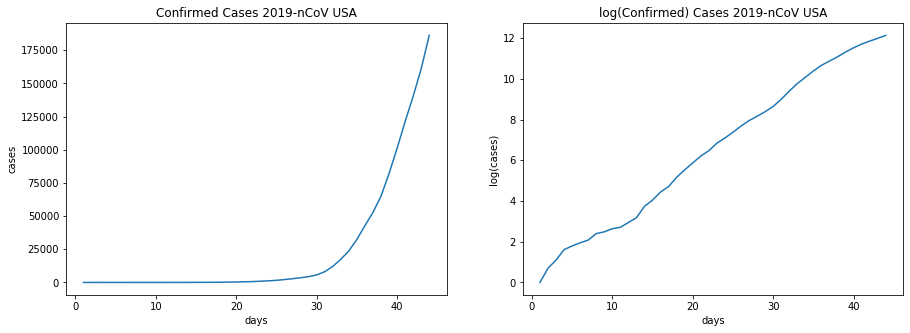

In [19]:
# Plot the wikipedia daily case data 
Day = list(range(1,len(Infected)+1))


figure, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

axes[0].plot(Day,Infected)
axes[0].set_title('Confirmed Cases 2019-nCoV USA')
axes[0].set_xlabel("days")
axes[0].set_ylabel("cases")


# use log scale to show log-linear growth 
axes[1].plot(Day,np.log(Infected))
axes[1].set_title('log(Confirmed) Cases 2019-nCoV USA')
axes[1].set_xlabel("days")
axes[1].set_ylabel("log(cases)")


plt.show()


In [20]:
# total population
N = 300_000_000  
# initial infected
I0 = 1
# initial recovered
R0 = 1
#initial susceptible
S0 = N - I0 - R0

We’ll also need to assign values for $\beta$ and $\gamma$. We’ll optimize the model for the best $\beta$ and $\gamma$.

Now, let’s build our initial conditions vector,  and then use linspace to create an array containing our 200 sampling points (days).

In [21]:
# initial conditions vector
y0 = (S0, I0, R0)
# 200 evenly spaced values (representing days)
t = np.linspace(1, 200, 200)

Here's the SIR differential equation model again

In [22]:
# the code for the sir function
def SIR(y, t, N, beta, gamma):
    # S, I, R values assigned from vector
    S, I, R = y
    # differential equations
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N -(gamma * I)                 
    dRdt = gamma * I                  
    return dSdt, dIdt, dRdt

Let's create a residual sum of squares function RSS that minimizes the RSS between the SIR model and the observed data wrt to $\beta$ and $\gamma$.

I will use minimize and least_squares from the scipy.optimize library.

In [23]:
# function to integrate SIR model from starting conditions but with ability to change beta over time
def SIR_Integ(y0,t,N,beta_0,gamma):
    
    y = y0
    values = np.zeros((len(t),3)) 
    values[0,0] =   S0      # S0
    values[0,1] =   I0       # I0           
    values[0,2]=   R0      # R0
    beta = beta_0
    
    for i in range(1,len(t)):
        dSt, dIt, dRt = SIR(y, t, N, beta, gamma)  
        
        values[i,0] = values[i-1,0]+dSt
        values[i,1] = values[i-1,1]+dIt   
        values[i,2] = values[i-1,2]+dRt
        y = (values[i,0],values[i,1],values[i,2] )        
        
    return values

# An RSS (residual sum of squares) function to fit best beta and gamma using the least squares optimizer

In [24]:
import numpy as np
from scipy.optimize import minimize,least_squares

# python optimization function
def RSS(x,y0,t,N,Infected):

    #import pdb;pdb.set_trace()
    # Integrate the diff eqs over the time array
    out = SIR_Integ(y0,t, N, x[0], x[1])
    
    # assign S, I, R values from values transpose
    S, I, R = out.T
    
    rss = np.sum((np.array(I)-np.array(Infected))**2)
    return rss

# contact rate
beta = 0.3
# mean recovery rate
gamma = 0.1
model = 1

# Check the function
RSS([beta,gamma],y0,t[0:len(Infected)],N,Infected)

119636692593.39662

In [25]:
# optimal beta and gamma using least squares optimizer
sub_t = t[0:len(Infected)]
ropt = least_squares(fun=RSS,
                args=(y0,sub_t,N,Infected),
                x0 = (0.5,0.5))      # <- initial guess

print(ropt)

 active_mask: array([0., 0.])
        cost: 1.8156871547511554e+19
         fun: array([6.02608854e+09])
        grad: array([-5.21401092e+17,  6.81169765e+16])
         jac: array([[-86523968.,  11303680.]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 25
        njev: 13
  optimality: 5.214010920224091e+17
      status: 2
     success: True
           x: array([0.66588444, 0.33412344])


# Base Case - Status quo, no change in Beta i.e. no social distancing

In [26]:
# Integrate the diff eqs over the time array using the best fit beta and data for recent data
beta = ropt["x"][0]
gamma = ropt["x"][1]
model = 1
slow = 0.7

if model == 1:
    values = SIR_Integ(y0, t, N, beta, gamma)
else:
    values = SIR_Integ(y0, t, N, beta*slow, gamma)
# Assign S, I, R values from values transpose
S, I, R = values.T

Finally, plot the arrays using matplotlib:

In [27]:
# Expand the output window to display charts
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

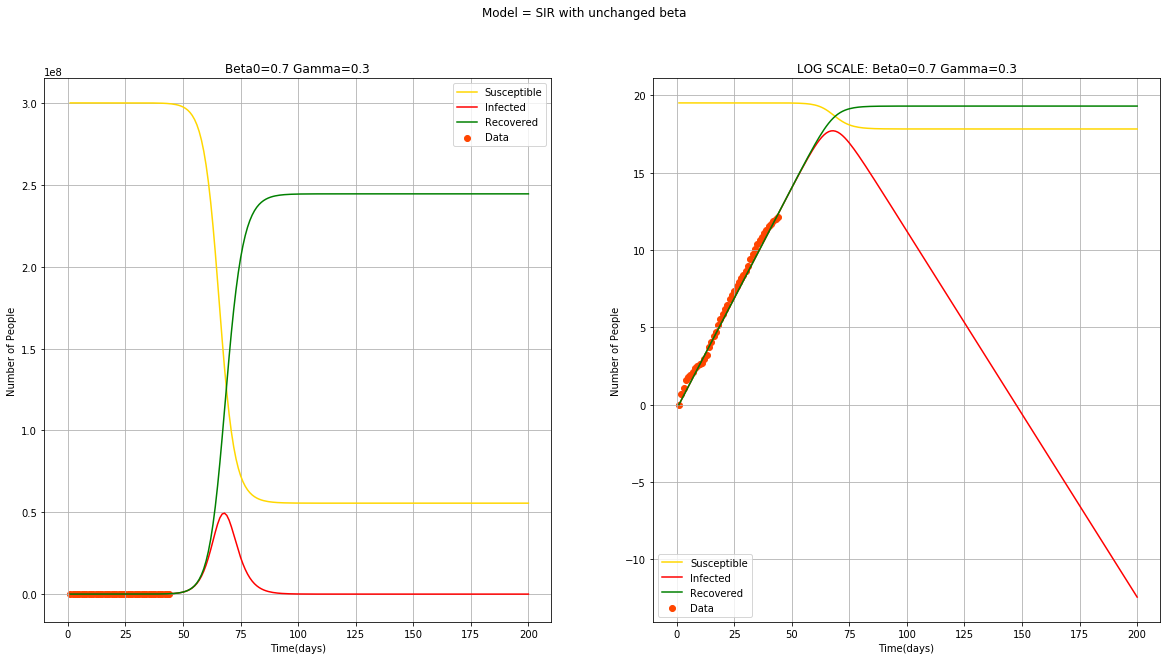

In [28]:

# Creates two subplots and unpacks the output array immediately
fig, (ax0, ax1) = plt.subplots(1, 2,figsize=(20, 10))

# first plot not transformation on data
ax0.plot(t,values[:, 0],'gold',label='Susceptible'  )
ax0.plot(t,values[:, 1],'red',label='Infected'  )
ax0.plot(t,values[:, 2],'g',label='Recovered'  )
ax0.set_title('Beta0=0.7 Gamma=0.3')
ax0.set_xlabel("Time(days)")
ax0.set_ylabel("Number of People")
ax0.scatter(Day,Infected, c='orangered', label='Data')
ax0.legend(loc='best')
ax0.grid()


# second plot - log of data to show exponential nature of growth
ax1.plot(t, np.log(values[:, 0]),'gold',label='Susceptible'  )
ax1.plot(t, np.log(values[:, 1]),'red',label='Infected'  )
ax1.plot(t, np.log(values[:, 2]),'g',label='Recovered'  )
ax1.set_title('LOG SCALE: Beta0=0.7 Gamma=0.3')
ax1.set_xlabel("Time(days)")
ax1.set_ylabel("Number of People")
ax1.scatter(Day,np.log(Infected), c='orangered', label='Data')
ax1.legend(loc='best')
ax1.grid()

if model == 1:
    fig.suptitle(f'Model = SIR with unchanged beta')
else:
    fig.suptitle(f'Model = SIR with Slowed Beta --- beta drops from {beta:.2f} to {beta*slow:.2f}')
    
plt.show()

I see in the right log-linear plot that the model seems to fit the values quite well. I can now extract some interesting statistics. One important number is the so-called basic reproduction number (also basic reproduction ratio)  (pronounced “R naught”) which basically shows how many healthy people get infected by a sick person on average:

In [29]:
# summarry of the statistics

print("Model = SIR with unchanged beta")
R0 = beta/gamma   
mort = 0.01    # assumed mortality rate
print("  RO = ",format(R0,'0.2f'))
pk = np.argmax(I)
print("  Days to Peak Infection = ",pk)

print("  Remaining days to peak infection = ", format(pk - Day[-1] ,",.0f") )

print("  Peak Infected = ", format(I[pk],",.0f")," or ",format(I[pk]/N,".2%"),"of population")

print("  Peak Recoverd (Immune + Dead) = ", format(R[-1],",.0f")," or ",format(R[-1]/N,".2%"),"of population")

print("  Deaths at Infection Peak = ", format(R[pk] * 0.01 ,",.0f"),"at mortality rate of ",format(mort,".2%"))

# max deaths with supposed 1% mortality rate
print("  Total Deaths = ",format(R[-1] * 0.01,',.0f'),"at mortality rate of ",format(mort,".2%"))   

Model = SIR with unchanged beta
  RO =  1.99
  Days to Peak Infection =  67
  Remaining days to peak infection =  23
  Peak Infected =  49,431,363  or  16.48% of population
  Peak Recoverd (Immune + Dead) =  244,454,458  or  81.48% of population
  Deaths at Infection Peak =  1,123,218 at mortality rate of  1.00%
  Total Deaths =  2,444,545 at mortality rate of  1.00%


In [30]:
Cases = 500000
cross_day = (I>Cases).argmax()
# generates output below
print("Model = SIR with unchanged beta")
print("  Day at which 500,000K infections reached = ", cross_day, "days or", cross_day-len(Infected),"days from now")
print("  Infections = ", format(I[cross_day],",.0f"))


Model = SIR with unchanged beta
  Day at which 500,000K infections reached =  46 days or 2 days from now
  Infections =  526,375


# Case 2 - Slowed Beta for example b/c of social distancing

In [31]:
# Integrate the diff eqs over the time array using the best fit beta and data for recent data
beta = ropt["x"][0]
gamma = ropt["x"][1]
slow = 0.7
model = 2
# your code here
if model == 1:
    values = SIR_Integ(y0, t, N, beta, gamma)
else:
    values = SIR_Integ(y0, t, N, beta*slow, gamma)

# assign S, I, R values from values transpose
S, I, R = values.T

Finally,  plot the arrays using matplotlib:

<Figure size 432x288 with 0 Axes>

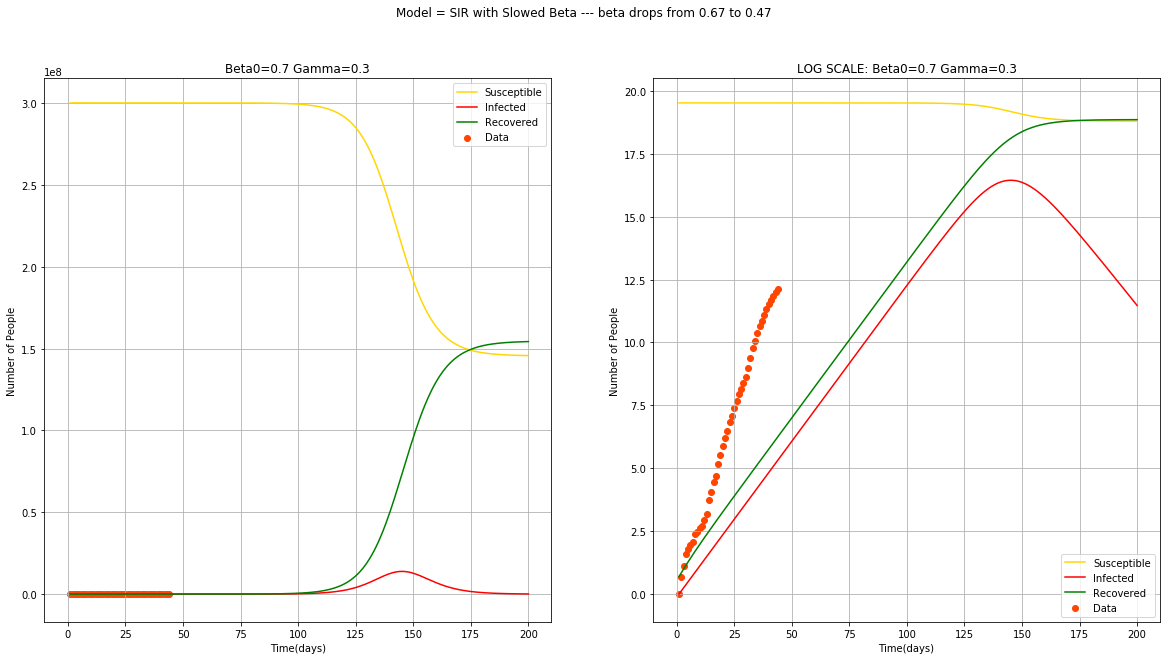

In [32]:
fig = plt.figure()
# Creates two subplots and unpacks the output array immediately
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))


# first plot not transformation on data
ax1.plot(t,values[:, 0],'gold',label='Susceptible'  )
ax1.plot(t,values[:, 1],'red',label='Infected'  )
ax1.plot(t,values[:, 2],'g',label='Recovered'  )
ax1.set_title('Beta0=0.7 Gamma=0.3')
ax1.set_xlabel("Time(days)")
ax1.set_ylabel("Number of People")
ax1.scatter(Day,Infected, c='orangered', label='Data')
ax1.legend(loc='best')
ax1.grid()


# second plot - log of data to show exponential nature of growth
ax2.plot(t, np.log(values[:, 0]),'gold',label='Susceptible'  )
ax2.plot(t, np.log(values[:, 1]),'red',label='Infected'  )
ax2.plot(t, np.log(values[:, 2]),'g',label='Recovered'  )
ax2.set_title('LOG SCALE: Beta0=0.7 Gamma=0.3')
ax2.set_xlabel("Time(days)")
ax2.set_ylabel("Number of People")
ax2.scatter(Day,np.log(Infected), c='orangered', label='Data')
ax2.legend(loc='best')
ax2.grid()

if model == 1:
    fig.suptitle(f'Model = SIR with unchanged beta')
else:
    fig.suptitle(f'Model = SIR with Slowed Beta --- beta drops from {beta:.2f} to {beta*slow:.2f}')
    

plt.show()

I see in the right log-linear plot that the model seems to fit the values quite well. I can now extract some interesting statistics. One important number is the so-called basic reproduction number (also basic reproduction ratio)  (pronounced “R naught”) which basically shows how many healthy people get infected by a sick person on average:

In [33]:
# summarry of the statistics
RNew = beta*slow/gamma  
mort = 0.01    # assumed mortality rate
pk = np.argmax(I)

print("Model = Slowed Beta --- beta drops from 0.68 to 0.47")
  
print("  RO = ",format(R0,'0.2f'))

print("  RNew = ",format(RNew,'0.2f'))
      
print("  Days to Peak Infection = ", pk)

print("  Remaining days to peak infection = ", format(pk - Day[-1] ,",.0f") )

print("  Peak Infected = ", format(I[pk],",.0f")," or ",format(I[pk]/N,".2%"),"of population")
      
print("  Deaths at Infection Peak = ", format(R[pk] * 0.01 ,",.0f"),"at mortality rate of ",format(mort,".2%"))

print("  Peak Recoverd (Immune + Dead) = ", format(R[-1],",.0f")," or ",format(R[-1]/N,".2%"),"of population")

# max deaths with supposed 1% mortality rate
print("  Total Deaths = ",format(R[-1] * 0.01,',.0f'),"at mortality rate of ",format(mort,".2%"))  

Model = Slowed Beta --- beta drops from 0.68 to 0.47
  RO =  1.99
  RNew =  1.40
  Days to Peak Infection =  144
  Remaining days to peak infection =  100
  Peak Infected =  13,872,503  or  4.62% of population
  Deaths at Infection Peak =  729,573 at mortality rate of  1.00%
  Peak Recoverd (Immune + Dead) =  154,230,294  or  51.41% of population
  Total Deaths =  1,542,303 at mortality rate of  1.00%


 The US has approximately 950K hospital beds. Would we have enough beds at peak
 assuming 1% of the infected need medical attention? 

At the time of the peak of Infection, assuming 1% needed medical attention, then there would be enough beds available in the US.

In [34]:
Cases = 500_000
cross_day = (I>Cases).argmax()
print("Model = Slowed Beta --- beta drops from 0.68 to 0.47")
print("  Day at which 500,000K infections reached = ", cross_day, "days or", cross_day-len(Infected),"days from now.")
print("  Infections = ", format(I[cross_day],",.0f"))


Model = Slowed Beta --- beta drops from 0.68 to 0.47
  Day at which 500,000K infections reached =  106 days or 62 days from now.
  Infections =  500,555
